# <center> **Grupo más Cercano (Nearest Group)**

# Similitud


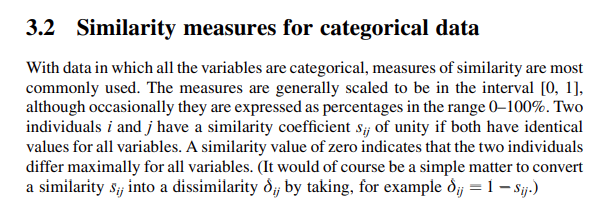


**Referencia:**

- [Brian S. Everitt, et al., Clueter Analysis, 5th edition, p.46](https://cicerocq.files.wordpress.com/2019/05/cluster-analysis_5ed_everitt.pdf)

**Summary:**

- 0 : Un coeficiente de similitud de 0 significa que dos conjuntos, i y j, son distintos, es decir, que tienen una diferencia máxima.
- 1 : Un coeficiente de similitud de 1 significa que dos conjuntos, i y j, son idénticos.   

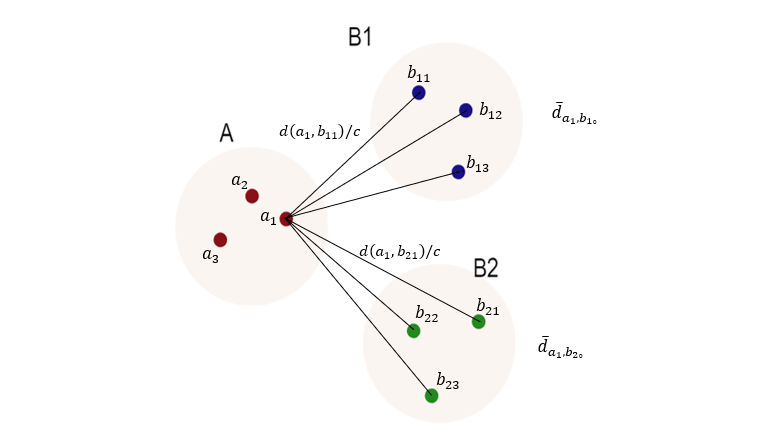

**Distancie en una superficie esférica**



Para calcular la distancia se empleó la fórmula de [Haversine](https://en.wikipedia.org/wiki/Haversine_formula)

$d = R \times c$

$c = 2 \times arctan2(\sqrt{a},\sqrt{1-a})$

y

$a= sin^2(\frac{\Delta \phi^2 }{2}) + \cos(\phi_1)\times \cos(\phi_2) \times sin^2(\frac{\Delta \lambda }{2})$

donde:

- $\phi$ : latitud
- $\lambda$ : longitud
- d : Radio medio en km

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from statistics import mode
from geopy.distance import geodesic
from statistics import mean
import time
sns.set()

**Distancia euclideana: Tijuana a bacalar**

In [2]:
def euclidean_dist(x,y):
  dist = np.sqrt(np.sum([(a-b)**2 for a,b in zip(x,y)]))
  return dist

**Distancia a centroides Trigo**

In [3]:
b = [27.09, -109.12] # beneficiarios
x = [18.92, -98.55] # marginación
y = [20.42, -99.20] # precio

d1, d2 = geodesic(b, x).km, geodesic(b, y).km
print('Centroides: ', [d1,d2])

Centroides:  [1410.4286503333296, 1251.4714786045095]


**Distancia a centroides Maíz**

In [4]:
b = [19.93, -100.08] # beneficiarios
x = [18.48, -97.47] # marginación
y = [20.44, -99.95] # precio

d1, d2 = geodesic(b, x).km, geodesic(b, y).km
print('Centroides: ', [d1,d2])

Centroides:  [317.94899021888403, 58.072453918627325]


# <center> **Grupo más cercano**

Primero instalamos el paquete [socialprograms](https://pypi.org/project/socialprograms/), e importamos el módulo **NearestGroup**.

In [5]:
!pip install socialprograms==0.2.0

In [6]:
from algorithms.socialprograms import NearestGroup

# **Ejemplo 1: Datos sintéticos con 2 grupos**

Primero generamos un conjunto de datos con la función make_blobs, comenzamos con **3 grupos**.

In [7]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_classification, make_blobs

random.seed(23456798)

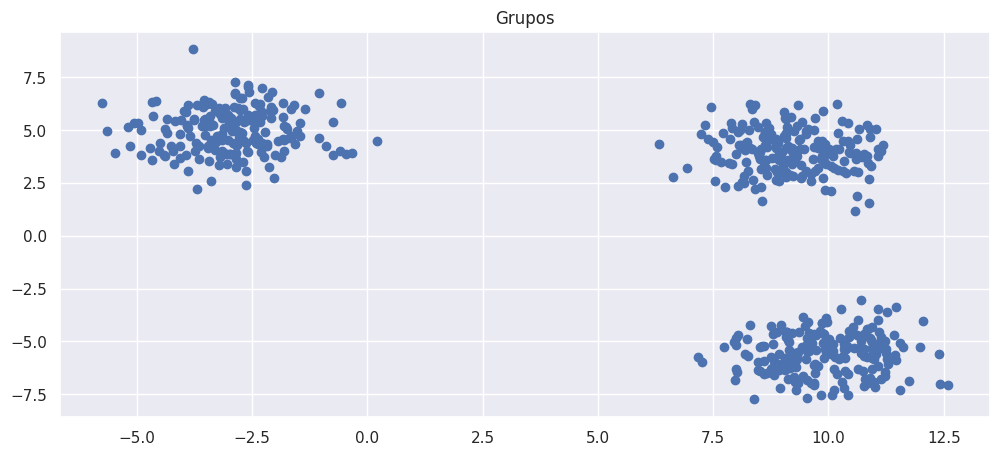

In [8]:
X, y = make_blobs(n_samples=600,centers=3, random_state=24)
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12,5))
plt.title('Grupos')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Para separar el conjunto de datos por cada grupos, empleamos el algoritmo de k-means con $k=3$ para realizar dicha tarea.

In [9]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2]


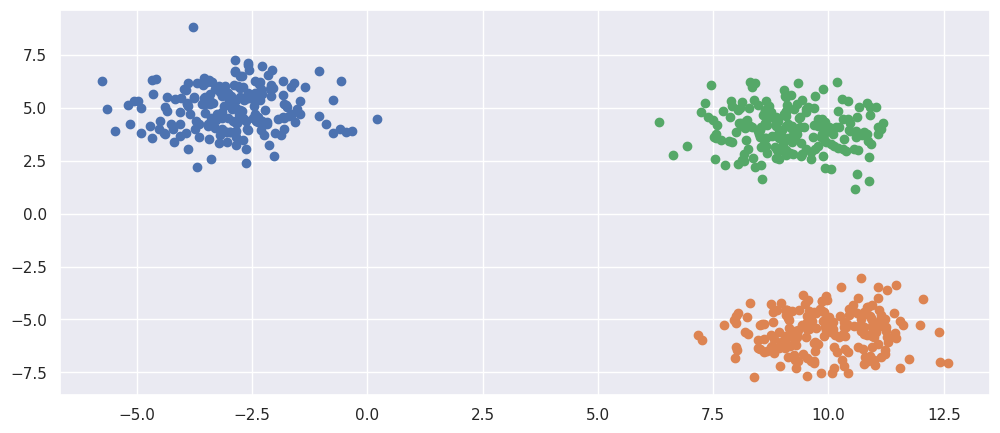

In [10]:
modelo = KMeans(n_clusters=3)

modelo.fit(X)
# retorna las etiquetas
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,5))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

Ahora formamos un dataframe con los datos generados y con la etiqueta del cluster correspondiente.

In [11]:
# base
base = pd.DataFrame(X).rename({0:'Lat',1:'Lon'}, axis=1)
base['cluster'] = y_clusters
base.head()

,Lat,Lon,cluster
0,-3.640627,3.649409,0
1,-1.826795,4.584232,0
2,10.428592,4.473935,2
3,-3.880441,3.061071,0
4,-3.403694,5.647732,0


Separamos el dataframe formado por cada grupo correspondiente, y graficamos.

In [12]:
sample1 = base[base['cluster'] == 0].drop('cluster', axis=1).reset_index(drop=True)
sample2 = base[base['cluster'] == 1].drop('cluster', axis=1).reset_index(drop=True)
sample3 = base[base['cluster'] == 2].drop('cluster', axis=1).reset_index(drop=True)

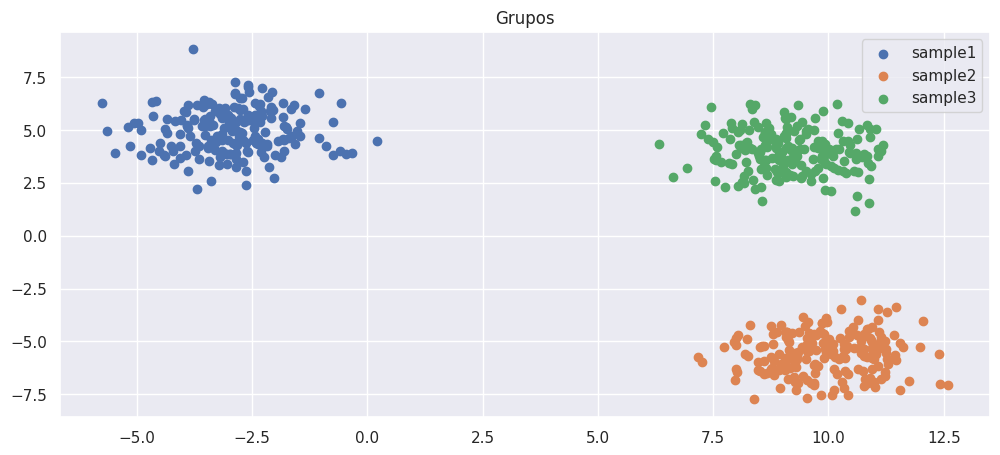

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(sample1['Lat'], sample1['Lon'], label='sample1')
plt.scatter(sample2['Lat'], sample2['Lon'], label='sample2')
plt.scatter(sample3['Lat'], sample3['Lon'], label='sample3')
plt.title('Grupos')
plt.legend()
plt.show()

Finalmente, para aplicar el algoritmo, por cada observación de cada muestra generamos tuplas (lat, y lon).

In [14]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['Lat'], sample1['Lon'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['Lat'], sample2['Lon'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['Lat'], sample3['Lon'])]

In [15]:
print(np.array(samp1).shape)
print(np.array(samp2).shape)
print(np.array(samp3).shape)

(200, 2)
(200, 2)
(200, 2)


In [16]:
# valores
base = samp1
grupos = {'sample1': samp2,
          'sample2':samp3,
          'sample3':samp1}

In [17]:
# Ejecutamos
nearest_group = NearestGroup(metric='euclidean')
d, means, coeff = nearest_group.fit(base, grupos)
nearest_group.summary()

------------------------------------------------------------------------------------------------------------------------- 
-                                                        Summary                                                        -
------------------------------------------------------------------------------------------------------------------------- 
 Base (Obs): 	 	 200 
 Groups (Obs): 	 	 [200, 200, 200] 
 
 Nearest Group: 	 sample3 
 Avg. Distance: 	 [16.7241 12.2486  1.827 ] 
 Coeff. Similitud: 	 [0.1404 0.3704 1.    ] 
------------------------------------------------------------------------------------------------------------------------


De lo anterios observamos que el conjunto base tiene 200 observaciones, los grupos de comparación 200 observaciones para cada uno. El grupo más cercano corresponde a la muestra 3, la cual es consistente con la menor distancia promedsio y mediante el mayor coeficiente de similitud.  

# **Ejemplo 2: Datos sintéticos con 3 grupos**

Primero generamos un conjunto de datos con la función make_blobs, comenzamos con **5 grupos**.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_classification, make_blobs

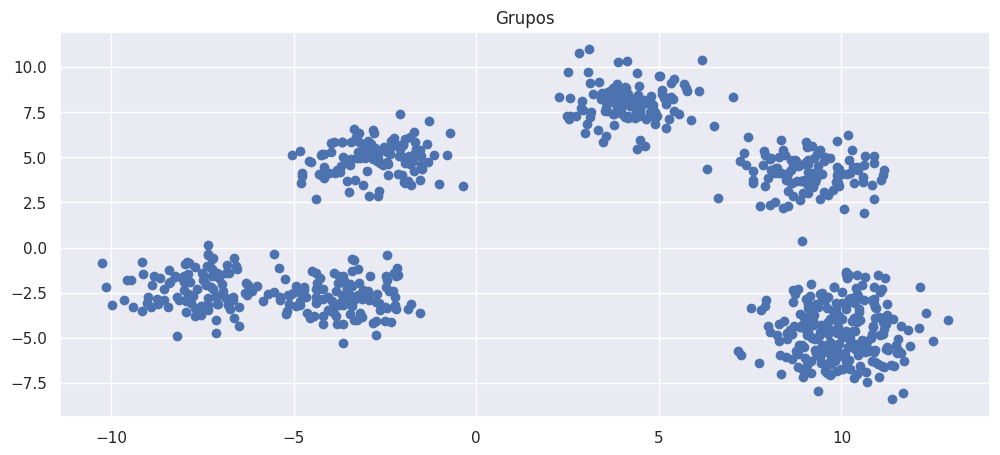

In [19]:
X, y = make_blobs(n_samples=800,centers=7, random_state=24)
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12,5))
plt.title('Grupos')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Para separar el conjunto de datos por cada grupos, empleamos el algoritmo de k-means con $k=5$ para realizar dicha tarea.

In [20]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2 3 4]


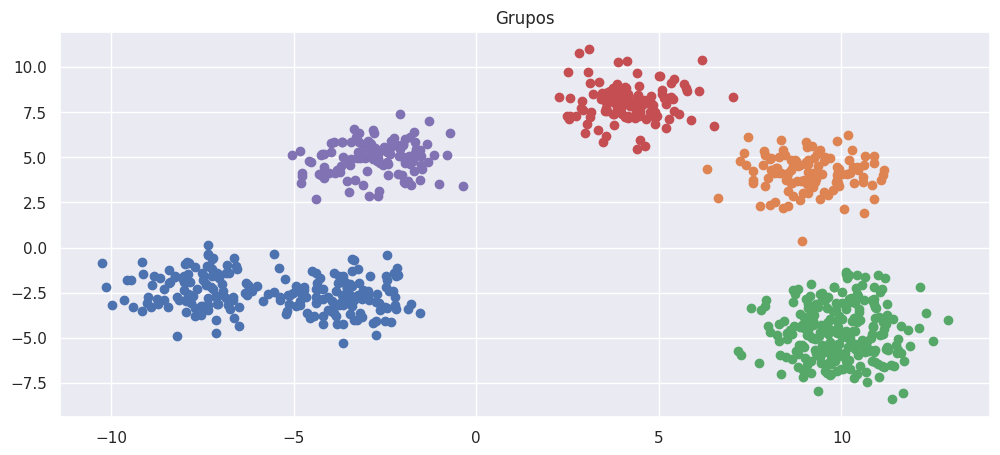

In [21]:
modelo = KMeans(n_clusters=5)

modelo.fit(X)
# retorna las etiquetas
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,5))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])
plt.title('Grupos')
plt.show()

Ahora formamos un dataframe con los datos generados y con la etiqueta del cluster correspondiente.

In [22]:
# base
base = pd.DataFrame(X).rename({0:'Lat',1:'Lon'}, axis=1)
base['cluster'] = y_clusters
base.head()

,Lat,Lon,cluster
0,11.881873,-5.478030,2
1,-0.800726,5.132793,4
2,-7.100404,-1.560874,0
3,10.386248,-2.227496,2
4,10.290632,5.417513,1


Separamos el dataframe formado por cada grupo correspondiente, y graficamos.

In [23]:
sample1 = base[base['cluster'] == 0].drop('cluster', axis=1).reset_index(drop=True)
sample2 = base[base['cluster'] == 1].drop('cluster', axis=1).reset_index(drop=True)
sample3 = base[base['cluster'] == 2].drop('cluster', axis=1).reset_index(drop=True)
sample4 = base[base['cluster'] == 3].drop('cluster', axis=1).reset_index(drop=True)
sample5 = base[base['cluster'] == 4].drop('cluster', axis=1).reset_index(drop=True)

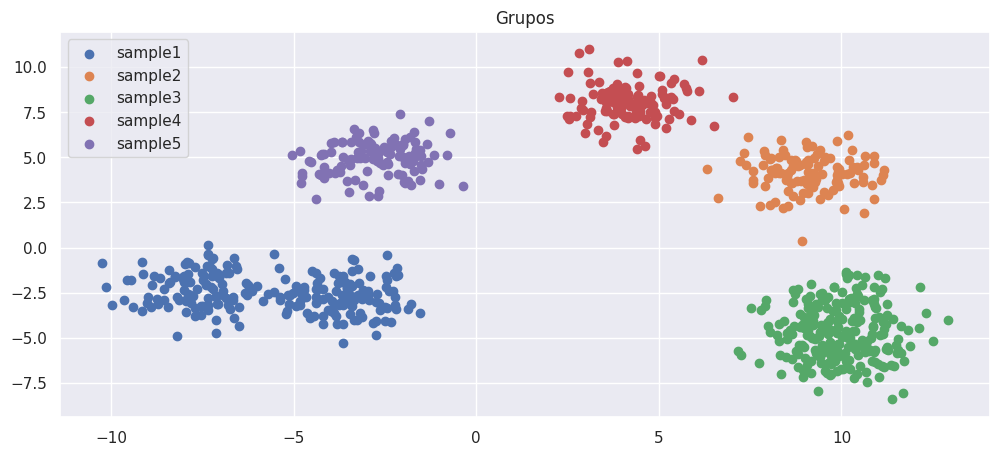

In [24]:
plt.figure(figsize=(12,5))
plt.scatter(sample1['Lat'], sample1['Lon'], label='sample1')
plt.scatter(sample2['Lat'], sample2['Lon'], label='sample2')
plt.scatter(sample3['Lat'], sample3['Lon'], label='sample3')
plt.scatter(sample4['Lat'], sample4['Lon'], label='sample4')
plt.scatter(sample5['Lat'], sample5['Lon'], label='sample5')
plt.title('Grupos')
plt.legend()
plt.show()

Finalmente, para aplicar el algoritmo, por cada observación generamos la tupla (lat, lon).

In [25]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['Lat'], sample1['Lon'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['Lat'], sample2['Lon'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['Lat'], sample3['Lon'])]
samp4 = [[val1, val2] for val1, val2 in zip(sample4['Lat'], sample4['Lon'])]
samp5 = [[val1, val2] for val1, val2 in zip(sample5['Lat'], sample5['Lon'])]

y aplicamos el algorítmo

In [26]:
# Muestra base
base = samp1

# Muestras de comparación
grupos = {'sample2':samp2,
          'sample3':samp3,
          'sample4':samp4,
          'sample5':samp5,
          'sample6':samp1}

Imprimimos resultados

In [27]:
# Ejecutamos
nearest_group = NearestGroup(metric='euclidean')
d, means, coeff = nearest_group.fit(base, grupos)
nearest_group.summary()

------------------------------------------------------------------------------------------------------------------------- 
-                                                        Summary                                                        -
------------------------------------------------------------------------------------------------------------------------- 
 Base (Obs): 	 	 228 
 Groups (Obs): 	 	 [116, 228, 114, 114, 228] 
 
 Nearest Group: 	 sample6 
 Avg. Distance: 	 [16.1804 15.7807 14.5046  8.2946  2.985 ] 
 Coeff. Similitud: 	 [0.1973 0.2172 0.2805 0.5885 1.    ] 
------------------------------------------------------------------------------------------------------------------------


Primero, el grupo base contiene 228 observaciones, mientras que la muestra 2 (sample2) contiene 114, la muestra 3 (sample3) 228, la muestra 4 (sample4) 114, muestra 5 (sample5) 116, muestra 6 (sample6) 228. El grupo más cercano corresponde a la muestra 6 (sample6). Gráficamente podemos corroborarlo, y al igual que el caso anterior, la distancia promedio y el coeficiente de similitud son consistente, es decir, a menor distancia o mayor coeficiente de similitud, la cercania entre los grupos es mayor.

# <center> **Datos de Beneficiarios y Escenarios**

Antes de comenzar con los ejemplos numéricos, vamos a determinar el parámetro $c$, es decir, la distancia que hay entre tijuana y bacalar, una vez calculado
el valor lo emplearemos al definir la clase $NearestGroup(metric, c)$, ya si no agregamos el parámetro $c$ por defecto la estimación se hace considerando la distancia máxima entre los puntos de beneficiarios al resto de puntos.

In [ ]:
# latitud y longitud
tijuana = [18.6783, -88.3924]
bacalar = [32.5027, -117.0037]

# distancia euclideana
distancia = euclidean_dist(x=tijuana,y=bacalar)
distancia

31.77609987160161

**Casi 1: Maíz**

In [ ]:
producto = 'Maíz'
anio = 2021

In [ ]:
benef = pd.read_excel('PBeneficiarios_data_2021.xlsx')
print(benef.columns)
benef_filt = benef[benef['Anio']==anio]
benef_filt = benef_filt[benef_filt['Producto']==producto]
benef_filt = benef_filt[['LAT_DECIMAL','LON_DECIMAL']].dropna(axis=0)
benef_filt.head()

Index(['Anio', 'Producto', 'Edad', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN',
       'CVE_LOC', 'NOM_LOC', 'EML', 'Ciclo Productivo',
       'Precio de garantía $ (Litro/Tonelada)', 'Precio referencia',
       'Volumen incentivado (Litros / Toneladas)', 'Monto de apoyo total $',
       'Tamaño del productor', 'IML', 'GML', 'IMM', 'GMM', 'LATITUD',
       'LONGITUD', 'LAT_DECIMAL', 'LON_DECIMAL'],
      dtype='object')


,LAT_DECIMAL,LON_DECIMAL
3632,20.334282,-101.638008
3633,20.375100,-101.698306
3634,20.303605,-101.812116
3635,20.219654,-101.794496
3638,20.646378,-101.520400


In [ ]:
prod = pd.read_excel('TotalProductores2.xlsx')
prod_filt = prod[prod['Anio']==anio]
prod_filt = prod_filt[prod_filt['Producto']==producto]
prod_filt.head()

,Anio,Producto,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,TotalCosechada,TotalProductores,GM,IM,Escenario1,Escenario2,LAT_DECIMAL,LON_DECIMAL
554,2021,Maíz,15,México,91,Teoloyucan,57.0,22,Muy bajo,0.922150,NaN,4.160578e+09,19.75,-99.18
555,2021,Maíz,10,Durango,17,Ocampo,2798.0,115,Bajo,0.870007,NaN,4.154602e+09,26.44,-105.51
556,2021,Maíz,10,Durango,1,Canatlán,5108.0,209,Muy bajo,0.887781,NaN,4.138893e+09,24.53,-104.78
557,2021,Maíz,10,Durango,9,Guanaceví,1908.0,78,Medio,0.829850,NaN,4.107130e+09,25.93,-105.95
558,2021,Maíz,14,Jalisco,76,San Martín de Bolaños,701.0,19,Medio,0.835887,NaN,4.097426e+09,21.68,-103.81


In [ ]:
esc1 = prod_filt.dropna(subset=['Escenario1'])[['LAT_DECIMAL',	'LON_DECIMAL']]
esc2 = prod_filt.dropna(subset=['Escenario2'])[['LAT_DECIMAL',	'LON_DECIMAL']]

In [ ]:
sample1 = benef_filt.copy().dropna()
print(sample1.shape)
sample2 = esc1.copy().dropna()
print(sample2.shape)
sample3 = esc2.copy().dropna()
print(sample3.shape)

(82357, 2)
(580, 2)
(271, 2)


In [ ]:
# sample1.to_csv('georef_benef_maiz.csv')
# sample2.to_csv('georef_marginacion_maiz.csv')
# sample3.to_csv('georef_precio_maiz.csv')

In [ ]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['LAT_DECIMAL'], sample1['LON_DECIMAL'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['LAT_DECIMAL'], sample2['LON_DECIMAL'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['LAT_DECIMAL'], sample3['LON_DECIMAL'])]

In [ ]:
# Muestra base Maíz
base = samp1

# Muestras de comparación
grupos = {'Marginación':samp2,
          'Precio':samp3}

# Ejecutamos
start_time = time.time()
nearest_group = NearestGroup(metric='euclidean', c=31.776099)
d, means, coeff = nearest_group.fit(base, grupos)
nearest_group.summary()

------------------------------------------------------------------------------------------------------------------------- 
-                                                        Summary                                                        -
------------------------------------------------------------------------------------------------------------------------- 
 Base (Obs): 	 	 82357 
 Groups (Obs): 	 	 [580, 271] 
 
 Nearest Group: 	 Marginación 
 Avg. Distance: 	 [7.1954 7.6895] 
 Coeff. Similitud: 	 [0.7736 0.758 ] 
------------------------------------------------------------------------------------------------------------------------


El resultado anterior nos indica que el grupo más cercano, al grupo de beneficialrios, corresponde al criterio de marginación.

**Trigo**

In [ ]:
producto = 'Trigo'
anio = 2021

In [ ]:
benef = pd.read_excel('PBeneficiarios_data_2021.xlsx')

benef_filt = benef[benef['Anio']==anio]
benef_filt = benef_filt[benef_filt['Producto']==producto]
benef_filt = benef_filt[['LAT_DECIMAL','LON_DECIMAL']].dropna(axis=0)

benef_filt.head()

print(benef_filt.shape)
#benef_filt.to_csv('georef_beneficiarios_trigo.csv')

(10300, 2)


In [ ]:
# Total productores
prod = pd.read_excel('TotalProductores2.xlsx')
prod_filt = prod[prod['Producto']==producto]
print(prod_filt.shape)

(482, 14)


In [ ]:
esc1 = prod_filt.dropna(subset=['Escenario1'])[['LAT_DECIMAL',	'LON_DECIMAL']]
print(esc1.shape)
esc2 = prod_filt.dropna(subset=['Escenario2'])[['LAT_DECIMAL',	'LON_DECIMAL']]
print(esc2.shape)

(165, 2)
(90, 2)


In [ ]:
# save to csv
#esc1.to_csv('georef_marginación.csv')
#esc2.to_csv('georef_precio.csv')

In [ ]:
sample1 = benef_filt.copy().dropna()
sample2 = esc1.copy().dropna()
sample3 = esc2.copy().dropna()

In [ ]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['LAT_DECIMAL'], sample1['LON_DECIMAL'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['LAT_DECIMAL'], sample2['LON_DECIMAL'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['LAT_DECIMAL'], sample3['LON_DECIMAL'])]

- sample2 : Escenario2
- sample3 : Escenario3

In [ ]:
# Muestra base Trigo
base = samp1

# Muestras de comparación
grupos = {'Marginación':samp2,
          'Precio':samp3}

# Ejecutamos
start_time = time.time()
nearest_group = NearestGroup(metric='euclidean', c=31.776099)
d, means, coeff = nearest_group.fit(base, grupos)
nearest_group.summary()

------------------------------------------------------------------------------------------------------------------------- 
-                                                        Summary                                                        -
------------------------------------------------------------------------------------------------------------------------- 
 Base (Obs): 	 	 10300 
 Groups (Obs): 	 	 [165, 90] 
 
 Nearest Group: 	 Precio 
 Avg. Distance: 	 [13.6275 12.2837] 
 Coeff. Similitud: 	 [0.5711 0.6134] 
------------------------------------------------------------------------------------------------------------------------


Para el caso del trigo, el grupo más cercano al grupo de beneficiarios corresponde al grupo generado con el criterio del precio.